<a href="https://colab.research.google.com/github/tchamna/LLM-Under-Ressourced-Languages/blob/main/Build_Medumba_Language_Model_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# REFERENCE: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-language-model-nlp-python-code/?


# code courtesy of https://nlpforhackers.io/language-models/
import pandas as pd

from nltk.corpus import reuters
from nltk import bigrams, trigrams, ngrams

from collections import Counter, defaultdict
import nltk


In [ ]:
def clean_text(x, punct = [".",",",";",":","!","?"]):
  for i in punct:
    x = x.replace(i,"")
    x = x.strip()
    #remove digits
    x = "".join([i for i in x if not i.isdigit()])
    x = " ".join(x.split())

  return x



# Getting Data

In [ ]:
!wget https://raw.githubusercontent.com/tchamna/recommender/main/corpus_vocabulaire_nufi_test.txt



--2023-05-21 01:23:22--  https://raw.githubusercontent.com/tchamna/recommender/main/corpus_vocabulaire_nufi_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305585 (298K) [text/plain]
Saving to: ‘corpus_vocabulaire_nufi_test.txt’

corpus_vocabulaire_ 100%[===================>] 298.42K  --.-KB/s    in 0.006s  

2023-05-21 01:23:23 (46.5 MB/s) - ‘corpus_vocabulaire_nufi_test.txt’ saved [305585/305585]



In [ ]:
pip install python-docx


In [ ]:
def from_many_documents_to_text(folder_path,output_file = "combined_output_test.txt"):
    
  import os
  from docx import Document



  with open(output_file, 'w') as output:
      for filename in os.listdir(folder_path):
          if filename.endswith('.docx'):
              doc = Document(os.path.join(folder_path, filename))
              output.write('\n'.join([paragraph.text for paragraph in doc.paragraphs]) + '\n')

  print(f"Documents combined and successfully saved here:{output_file}")

# folder_path = "/content/drive/MyDrive/Data_Science/DataSets/Nufi/Nufi_Documents/Nufi_Only"
folder_path = "/content/drive/MyDrive/Data_Science/DataSets/Medumba_Dataset"

output_file = "main_file1.txt"

from_many_documents_to_text(folder_path,output_file)



Documents combined and successfully saved here:main_file1.txt


In [ ]:
import os

# def combine_text_files(directory, output_file):
#     with open(output_file, 'w') as output:
#         for root, dirs, files in os.walk(directory):
#             for file_name in files:
#                 file_path = os.path.join(root, file_name)
#                 if file_path.endswith('.txt'):
#                     for line in fileinput.input(file_path):
#                         output.write(line)


def combine_text_files(directory, output_file, encoding='utf-8'):
    with open(output_file, 'w',encoding=encoding) as output:
        for root, _, files in os.walk(directory):
            for file_name in files:
                if file_name.endswith('.txt'):
                    file_path = os.path.join(root, file_name)
                    with open(file_path, 'r',encoding=encoding) as file:
                        output.write(file.read())

# Usage example


directory = "/content/drive/MyDrive/Data_Science/DataSets/Nufi/Nufi_Documents/Nufi_Only"
output_file = "main_file2.txt"

combine_text_files(directory, output_file)

directory = "/content/"
output_file = "main_file3.txt"

combine_text_files(directory, output_file)

In [ ]:

with open(output_file) as f:
  all_medumba = f.readlines()

all_medumba = [txt for txt in all_medumba if not txt.startswith("\n")]
all_medumba

In [ ]:
def length(text_list):
    
  l_w = 0
  words = []
  for i in range(len(text_list)):
    tokens = text_list[i].split()
    words += tokens 
    l_w += len(tokens)
  s = ""
  for i in range(len(text_list)):
    s += text_list[i]

  return l_w, len(s), len(set(s)), len(set(words)), set(words)

length(all_medumba)

In [ ]:
# with open(r"corpus_vocabulaire_nufi_test.txt") as f:
#   nufi_ = f.readlines()
# nufi_[0:5]
# corpus_nufi2 = all_nufi + nufi_
all_medumba_set = list(set(all_medumba))

medumba_clean = [clean_text(i.lower()) for i in all_medumba_set]

medumba_tokens = [i.split() for i in medumba_clean]
medumba_tokens[0:3]

In [ ]:

# # df = pd.read_fwf("https://raw.githubusercontent.com/tchamna/recommender/main/phrase_book_guide_conversation_vocabulaire_nufi_test.txt", sep=" ", header=None)
# df_nufi = pd.read_fwf("https://raw.githubusercontent.com/tchamna/recommender/main/corpus_vocabulaire_nufi_test.txt", sep=" ", header=None)

# df_nufi.columns = ["text","None"]
# df_nufi

# Build the model (Trigram)

In [ ]:
medumba_tokens


In [ ]:
# nltk.download('reuters')
# nltk.download('punkt')
# folder_path

path_model_3grams = folder_path + "Medumba_language_model_3gram.pickle"
path_model_4grams = folder_path + "Medumba_language_model_4gram.pickle"

def create_defaultdict():
      return defaultdict(int)
  # Create a placeholder for model
model_3g = defaultdict(create_defaultdict)

def model_generation_3gram(nufi_clean, nufi_tokens, text = "mə kɔ̌"):

  starting_seq_tuple = tuple(text.split(" "))
    
  # REFERENCE: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-language-model-nlp-python-code/?

  # code courtesy of https://nlpforhackers.io/language-models/
  import pandas as pd

  from nltk.corpus import reuters
  from nltk import bigrams, trigrams, ngrams

  from collections import Counter, defaultdict
  import nltk

  import pickle


  # Count frequency of co-occurance  
  for sentence in nufi_tokens:
      for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
          model_3g[(w1, w2)][w3] += 1
  
  # Let's transform the counts to probabilities
  for w1_w2 in model_3g:
      total_count = float(sum(model_3g[w1_w2].values()))
      for w3 in model_3g[w1_w2]:
          model_3g[w1_w2][w3] /= total_count


  
  starting_seq_str = " ".join(starting_seq_tuple)
  next_word = dict(model_3g[starting_seq_tuple])

  # print("starting_seq_str:", starting_seq_str)
  print()
  next_word_list = sorted(next_word, key=next_word.get,reverse=True)
  next_word_prob = [{i:round(next_word[i],5)} for i in next_word_list]
  # print("next_word_list:\n", next_word_list)
  print()
  print("next_word_prob:\n", next_word_prob)
  print()

  phrase_list_containing_starting_seq = [i for i in nufi_clean if starting_seq_str in i]
  # print("Phrases Containing Starting Sequence:\n",phrase_list_containing_starting_seq)


  with open(path_model_3grams, 'wb') as file:
    pickle.dump(model_3g, file)


  return next_word_list, next_word_prob, phrase_list_containing_starting_seq
  

# model_generation_3gram(nufi_clean,nufi_tokens,("ǒ", "ngén"))
# model_generation_3gram(nufi_clean,nufi_tokens,("yáá", "mɑ̀"))
# model_3g = model_generation_3gram(nufi_clean,nufi_tokens,("ngɑ̌", "pén"));

# model_generation_3gram(nufi_clean,nufi_tokens,("mɑ́", "kɑ́"))
# model_generation_3gram(nufi_clean,nufi_tokens,("ncà' sī"))

start_seq = "mə ju'"
start_seq = "ncà kə̀"
# start_seq = "â wə"
# start_seq = "â kə"

res = model_generation_3gram(medumba_clean,medumba_tokens,start_seq)




next_word_prob:
 [{"ghə̀'tə̀": 0.16667}, {'njǎm': 0.16667}, {'ywìmtə̌': 0.16667}, {'bɛ̀n': 0.16667}, {'botə': 0.16667}, {'bə': 0.16667}]



In [ ]:
keys = [list(i.keys())[0] for i in res[1]] 
vals = [list(i.values())[0] for i in res[1]] 

df = pd.DataFrame({ f"Next_Word":keys, "Probability": vals})
df["Word"] = start_seq

last = df.pop("Word")
df.insert(0,"Word",last)
df 

,Word,Next_Word,Probability
0,ncà kə̀,ghə̀'tə̀,0.16667
1,ncà kə̀,njǎm,0.16667
2,ncà kə̀,ywìmtə̌,0.16667
3,ncà kə̀,bɛ̀n,0.16667
4,ncà kə̀,botə,0.16667
5,ncà kə̀,bə,0.16667


In [ ]:
# list(model_3g.keys())
# # list(model_3g.values())

# Load the Model

In [ ]:
import pickle
from collections import defaultdict

def create_defaultdict():
      return defaultdict(int)
  # Create a placeholder for model
model_3g = defaultdict(create_defaultdict)

# Load the model from the pickle file
with open(path_model_3grams, 'rb') as file:
    model_3g = pickle.load(file)


# Text Generation (Trigram)

In [ ]:
# list(model_3g.keys())
# list(model_3g.values())

In [ ]:
# code courtesy of https://nlpforhackers.io/language-models/

import random



def text_generation_3gram(text ="ngɑ̌ yú'",model = model_3g):

  text = " ".join(text.lower().split())
  text = text.split(" ")
  
  text_ = text[:]
  if len(model[tuple(text_[-2:])].keys()) == 0:
    return f"{' ' .join(text_)} not in corpus"

  sentence_finished = False
  
  while not sentence_finished:
    # select a random probability threshold  
    r = random.random()
    accumulator = .0

    tup = tuple(text_[-2:])
    for word in model[tuple(text_[-2:])].keys():
        accumulator += model[tuple(text_[-2:])][word]
        # select words that are above the probability threshold
        if accumulator >= r:
            text_.append(word)
            break

    if text_[-2:] == [None, None]:
        sentence_finished = True

  text_generated = ' '.join([t for t in text_ if t])

  if text_generated in medumba_clean:
    # print("Original")
    # print(text_generated)
    return ("Original", text_generated)
  else:
    # print("Text Generated")
    # print(text_generated)
    return ("Text Generated", text_generated)
    # return (text_generated)

# TEST
text = ["ngɑ̌", "nkwé'"]
text = [ "nkwé'", "làh"]
text = "mə ju'"
# text = "ǎ lén"

# text = "mɑ́ kɑ́"

# tuple_text = tuple(text)
text_generation_3gram(text)

('Text Generated', "mə ju' mbɑ̀ ntsə’tə̀ ghǎco'tə ncà fa mî nùm ncǔ bo")

In [ ]:
# If you want to check the probability of Words Prediction, Run the Code Below
# tuple_text = tuple(text)
next_word_list, next_word_prob, phrase_list_containing_starting_seq = \
model_generation_3gram(medumba_clean,medumba_tokens,text)




next_word_prob:
 [{"mǒ'": 0.46154}, {'mbɑ̀': 0.11538}, {'nzə̀': 0.07692}, {'njǒŋ': 0.07692}, {'mbadtə̀': 0.07692}, {'ndʉ': 0.03846}, {'bə̀nntʉ̀n': 0.03846}, {'bǐn': 0.03846}, {'ɑngɛ̀l': 0.03846}, {'tɔ̌mbwog': 0.03846}]



# Build Interface using Gradio

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
import gradio as gr

In [ ]:


iface = gr.Interface(fn=text_generation_3gram,
                     inputs=gr.components.Textbox(lines=7, label="Example: mə ju' "),
                     outputs="text",
                     title="Medumba-Resulam 3Grams Text Completion")

iface.launch(share=True)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://47b6b310b0f600f720.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://47b6b310b0f600f720.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
# import pickle

# new_file = open("Nufi_language_model.pkl","wb")
# pickle.dump(model_3g,new_file)
# new_file.close()

# Build the model (Four Gram)

In [ ]:
# nltk.download('reuters')
# nltk.download('punkt')

path_model_4grams = folder_path + "Medumba_language_model_4gram.pickle"

def create_defaultdict():
      return defaultdict(int)
  # Create a placeholder for model
model_4g = defaultdict(create_defaultdict)


def model_generation_4gram(nufi_clean, nufi_tokens, initial_text = "ngɑ̌ yú' mɑ́", N_gram = 4):

  starting_seq_tuple = tuple(initial_text.split(" "))
    
  # REFERENCE: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-language-model-nlp-python-code/?

  # code courtesy of https://nlpforhackers.io/language-models/
  import pandas as pd

  from nltk.corpus import reuters
  from nltk import bigrams, trigrams, ngrams

  from collections import Counter, defaultdict
  import nltk

  import pickle


  # Count frequency of co-occurance  
  # Count frequency of co-occurance  
  for sentence in nufi_tokens:
      # for w1, w2, w3 in sixgrams(sentence, pad_right=True, pad_left=True):
      for w1, w2, w3, w4 in ngrams(sentence, N_gram, pad_right=True, pad_left=True):

          model_4g[(w1, w2,w3)][w4] += 1
  
  # Let's transform the counts to probabilities
  for w1_w2_w3 in model_4g:
      total_count = float(sum(model_4g[w1_w2_w3].values()))
      for w4 in model_4g[w1_w2_w3]:
          model_4g[w1_w2_w3][w4] /= total_count



  
  starting_seq_str = " ".join(starting_seq_tuple)
  next_word = dict(model_4g[starting_seq_tuple])

  print("starting_seq_str:", starting_seq_str)
  print()
  next_word_list = sorted(next_word, key=next_word.get,reverse=True)
  next_word_prob = [{i:round(next_word[i],5)} for i in next_word_list]
  print("next_word_list:\n", next_word_list)
  print()
  print("next_word_prob:\n", next_word_prob)
  print()

  phrase_list_containing_starting_seq = [i for i in medumba_clean if starting_seq_str in i]
  print("Phrases Containing Starting Sequence:\n",phrase_list_containing_starting_seq)


  with open(path_model_4grams, 'wb') as file:
    pickle.dump(model_4g, file)


  return next_word_list, next_word_prob, phrase_list_containing_starting_seq
  

text = "a cob mbɑ̀"
model_generation_4gram(medumba_clean,medumba_tokens,text)



starting_seq_str: a cob mbɑ̀

next_word_list:
 ["mô'", "mǒ'", 'bo']

next_word_prob:
 [{"mô'": 0.5}, {"mǒ'": 0.25}, {'bo': 0.25}]

Phrases Containing Starting Sequence:
 ["yənnɑ bə cʉɑ̌ a tum njən mǒ' ngàkwefe' lɛ̂n sə levi ndʉ̀ a tswə dʉ̌' nə̀kwe fe' yesu côb yi ndʉ̂ tam njàm ɑm levi faŋ njǒŋ cû tsə fa ndô tʉ ntam njàm i ghʉ̂ mô' mɑ̂ tsiàŋtə̀ ndʉb yesu ntʉ̂m ndɑ i mǒ' bwǒŋ ghǎkwefe’ mbɑ̀ bə̀nntʉ̌n tswə̂ nùm nkǒ’caŋ boɑ̀bo bɑ̌ fɑrisia mbɑ̀ ghǎlɛ̌n ŋwà’nì nsi cobtə ncob ghǎzi’tə nǔ yesu ndʉ̂ nǔmkə bǐn nkə njʉ mbɛ̀n nkə nu bin ɑ ghǎkwefe’ mbɑ̀ bə̀nkə̀bwɔ̀ ɑ̀ yesu bʉ̂ntə̀ ncob bo ndʉ̂ bə̀nntʉ̌n tsə bò tswə̂ mə̀bwɔ lɑ kə̂' bə diɑ̀g ngàghʉ̌ fu lɑ ndǎ' bə̌n tsə bò tswə̂ kə̀bwɔ̀ lɑ mə kə̀ na' nsə̂’ tsiaŋ ɑ̂ bə̀n nətsinə lɑ bə̀nkə̀bwɔ̀ nǔm nə̀kǎŋntʉ lɑ bo côb yi ndʉ à lô bə màdnù ghǎzi’tə nǔ yɔ̀hane nə̀kə ntswə̂ nzìkû'u mbɛ̀n nkə ndə̂’tə nsi mbɑ̀ bɑ̌ fɑrisia nǔmkə cô ghǎzi’tə nǔ nkə njʉ mbɛ̀n nu ɑ lɑ a cob bo ndʉ bə̂ bǐn ghʉ̂ shûn ndûngǒn tswə̂ nzìku' ngə̀laŋ boɑ̀ ndûngǒn bɛ̂n mbə lɑ ɑ̂ ndʉ̂kə

(["mô'", "mǒ'", 'bo'],
 [{"mô'": 0.5}, {"mǒ'": 0.25}, {'bo': 0.25}],
 ["yənnɑ bə cʉɑ̌ a tum njən mǒ' ngàkwefe' lɛ̂n sə levi ndʉ̀ a tswə dʉ̌' nə̀kwe fe' yesu côb yi ndʉ̂ tam njàm ɑm levi faŋ njǒŋ cû tsə fa ndô tʉ ntam njàm i ghʉ̂ mô' mɑ̂ tsiàŋtə̀ ndʉb yesu ntʉ̂m ndɑ i mǒ' bwǒŋ ghǎkwefe’ mbɑ̀ bə̀nntʉ̌n tswə̂ nùm nkǒ’caŋ boɑ̀bo bɑ̌ fɑrisia mbɑ̀ ghǎlɛ̌n ŋwà’nì nsi cobtə ncob ghǎzi’tə nǔ yesu ndʉ̂ nǔmkə bǐn nkə njʉ mbɛ̀n nkə nu bin ɑ ghǎkwefe’ mbɑ̀ bə̀nkə̀bwɔ̀ ɑ̀ yesu bʉ̂ntə̀ ncob bo ndʉ̂ bə̀nntʉ̌n tsə bò tswə̂ mə̀bwɔ lɑ kə̂' bə diɑ̀g ngàghʉ̌ fu lɑ ndǎ' bə̌n tsə bò tswə̂ kə̀bwɔ̀ lɑ mə kə̀ na' nsə̂’ tsiaŋ ɑ̂ bə̀n nətsinə lɑ bə̀nkə̀bwɔ̀ nǔm nə̀kǎŋntʉ lɑ bo côb yi ndʉ à lô bə màdnù ghǎzi’tə nǔ yɔ̀hane nə̀kə ntswə̂ nzìkû'u mbɛ̀n nkə ndə̂’tə nsi mbɑ̀ bɑ̌ fɑrisia nǔmkə cô ghǎzi’tə nǔ nkə njʉ mbɛ̀n nu ɑ lɑ a cob bo ndʉ bə̂ bǐn ghʉ̂ shûn ndûngǒn tswə̂ nzìku' ngə̀laŋ boɑ̀ ndûngǒn bɛ̂n mbə lɑ ɑ̂ ndʉ̂kə tsə̀mô’ le’njʉ nsi bə sə̀’ə bò lô' ndûngòn â cə̂n le’njʉ lɑ tsə bo nsi tswə nzìku' lɑ a cob mbɑ̀ mǒ

# Load 4-gram Model

In [ ]:
import pickle
from collections import defaultdict

path_model_4grams = folder_path + "Medumba_language_model_4gram.pickle"

def create_defaultdict():
      return defaultdict(int)
  # Create a placeholder for model
model_4g = defaultdict(create_defaultdict)

# Load the model from the pickle file
with open(path_model_4grams, 'rb') as file:
    model_4g = pickle.load(file)


In [ ]:
# nltk.download('reuters')
# nltk.download('punkt')
N = 4 # Four Gram
# Create a placeholder for model
# model_4g = defaultdict(lambda: defaultdict(lambda: 0))



In [ ]:
# # print(dict(model['ngɑ̌', 'ngén']))
# next_word = dict(model_4g["ǎ", "lén","mɑ́"])

# next_word_list = sorted(next_word, key=next_word.get,reverse=True)
# next_word_prob = [{i:next_word[i]} for i in next_word_list]
# print(next_word_list)
# next_word_prob
# #  [{'ǎ': 0.2}, {'kɑ̀': 0.2}, {'pèn': 0.2}, {'kɑ́': 0.2}, {'ó': 0.2}]


# Text Generation (Four Gram)

In [ ]:
# initial_text = "ngɑ̌ yú' mɑ́"
# starting_seq_tuple = tuple(initial_text.split(" "))



In [ ]:
# code courtesy of https://nlpforhackers.io/language-models/

import random


def text_generation_4gram(text = "mə ju' mbɑ̀",model = model_4g):

  text = " ".join(text.lower().split())
  text = text.split(" ")
  text_ = text[:]

  if len(model[tuple(text_[-3:])].keys()) == 0:
    return f"{' ' .join(text_)} not in corpus"

  sentence_finished = False
  
  while not sentence_finished:
    # select a random probability threshold  
    r = random.random()
    accumulator = .0

    tup = tuple(text_[-3:])
    for word in model[tuple(text_[-3:])].keys():
        accumulator += model[tuple(text_[-3:])][word]
        # select words that are above the probability threshold
        if accumulator >= r:
            text_.append(word)
            break

    if text_[-2:] == [None, None]:
        sentence_finished = True

  text_generated = ' '.join([t for t in text_ if t])

  if text_generated in medumba_clean:
    # print("Original")
    # print(text_generated)
    return ("Original", text_generated)
  else:
    # print("Text Generated")
    # print(text_generated)
    return ("Text Generated", text_generated)

# TEST

# starting words
text = ["ǎ", "nsī","pí"]
# text = ["ngɑ̌", "mɑ̀"]
text = ["ǹ", "kɑ̀'","zhī"]
text = ["à", "nsī","pí"]
text = "yáá mɑ̀ lāhā"
text = "kōsī ā lɑ́"
text = "zī ā lɑ́"
text = "mə nǔm ncob"

# text = "ǎ yíí nā"

# tuple_text = tuple(text)
res = text_generation_4gram(text)

res

('Text Generated',
 "mə nǔm ncob njǒŋ bə̀nntʉ̀n fa ntʉ̂m njʉ yə̂n mbwə̀ nə̀siaŋ bə̀nntʉ̀n nɑ na' mbə ɑ̂ mô' ngɑ̂mnyu ndʉb ndʉ̀ à bə ɑ̂ tsə ywεd nsi lɑ nǔmmbə̂ à lô là’tə̌ kôndɛ̀n i nùm ɑm nɑ")

In [ ]:

text = "mə ju' mǒ'"
text = "mə nǔm ncob"


sent_generated = []
c = 0
while True:

  c +=1

  if c==75:
    break
    
  # text = ["ǎ", "yá'"]
  # text = ["ngɑ̌", "yú'"]

  aa = text_generation_4gram(text)

  if aa[0] == "Text Generated":
    sent_generated.append(aa[1])

list(set(sent_generated))

In [ ]:

iface = gr.Interface(fn=text_generation_4gram,
                     inputs=gr.components.Textbox(lines=7, label="Example: Ngɑ̌ yú' mɑ́"),
                     outputs="text",
                     title="Nufi-Resulam 4G Text Completion")

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a865df8576a98d105f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
# words_dict = dict.fromkeys(words, "Nufi")
# words_dict = {words.index(i):i for i in words}
forbiden_characters = r":[]()&*»_.,;/–1234567890«?=!…’+"

ww = ['M.on..','ma.ri,',"l'a puni","p.", "poss.","m'aimes-tu?", "n'est", "c'est","c'nourriture-là", 'en,core',"mēn-wú,","<tag","ex.","br","bras","pl.","hom."," ", "syn.","1– <tag_def>","<tag_bullet>"]

def clean_word_function(word_list,forbid=forbiden_characters):
    
  def clean_word_in(w,forbid=forbiden_characters):    
    # s = ww[-1]
    # my_word = ""
    my_word = [i for i in w if i not in forbid]
    my_word = "".join(my_word)
    
    return my_word

  clean_word = list(map(clean_word_in,word_list))
    # words = [i for i in words]

  forbiden_characters2 = "<>"
  clean_word = [i for i in clean_word if all(elem not in i for elem in forbiden_characters2)]
  clean_word = [i for i in clean_word if i not in ["ex","br","pl","hom", "syn","poss","litt", "adj","cf","NB","p"]]
  return clean_word

clean_word = clean_word_function(ww)

forbiden_fr = ["est","là"]
forbiden_fr = ["est","l'","n'","là","présentatif","http","reference","il"]

# clean_word2 = [i for i in clean_word if i.lower() not in forbiden_fr ]

clean_word2 = [i for i in clean_word if all(elem not in i for elem in forbiden_fr)]


# all(elem not in "nourriture" for elem in forbiden_fr)

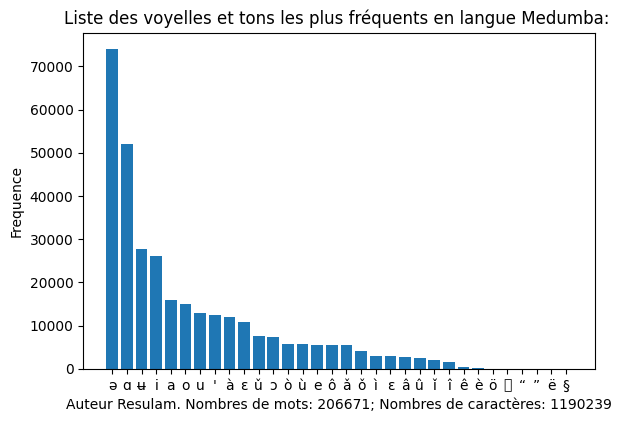

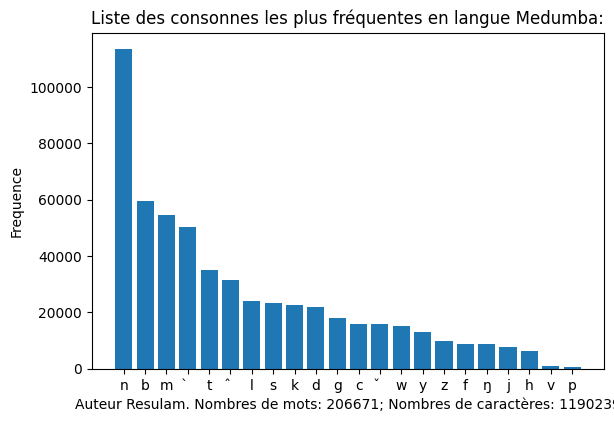

{'bə': 4994,
 'zə̀': 4856,
 'à': 4575,
 'nǔm': 4102,
 'ɑ̂': 3878,
 'mbɑ̀': 3319,
 'ndʉ': 3115,
 'i': 2826,
 'lɑ': 2812,
 'nsi': 2483,
 'bə̂': 2404,
 'bo': 2345,
 'bò': 2299,
 'a': 2157,
 'ncob': 2060,
 'lô': 2007,
 'kə': 1869,
 'kə̀': 1852,
 'bin': 1785,
 'tsə̀': 1778,
 'nùm': 1761,
 'nkə': 1485,
 'mbɑ̂': 1468,
 'cob': 1461,
 'njǒŋ': 1383,
 'mə̀': 1344,
 "kə̂'": 1236,
 'yi': 1220,
 'fa': 1215,
 'mə': 1150,
 "na'": 1011,
 'ɑm': 1011,
 'nǔmmbə̂': 912,
 'mɛ̌n': 879,
 'mɛ̀n': 857,
 'ngə̀laŋ': 810,
 'nɛ̂n': 807,
 'cwɛ̌d': 789,
 'mbə': 789,
 'yə̂n': 750,
 'bǐn': 719,
 'tsə': 717,
 'ngʉ̂': 709,
 'yub': 704,
 'bɛ̂n': 691,
 'nɑ': 682,
 'o': 678,
 'bə̌n': 674,
 'nù': 671,
 'bwə': 659,
 'ghʉ̌': 654,
 'ghʉ̂': 630,
 'bɑ̀': 612,
 'ò': 604,
 'ju': 579,
 'kɑ̂': 556,
 'wul': 552,
 'cu': 549,
 'bə̀n': 534,
 'lɛ̂n': 531,
 'zin': 517,
 'yən': 499,
 'ndʉ̂lɑlɑ': 497,
 'tum': 493,
 'zə': 484,
 'bə̀': 482,
 'mi': 479,
 'bɑ̌': 474,
 'njǎm': 467,
 'wud': 467,
 'tu': 458,
 'nǔ': 451,
 "mǒ'": 446,
 'mbwə̌': 435,


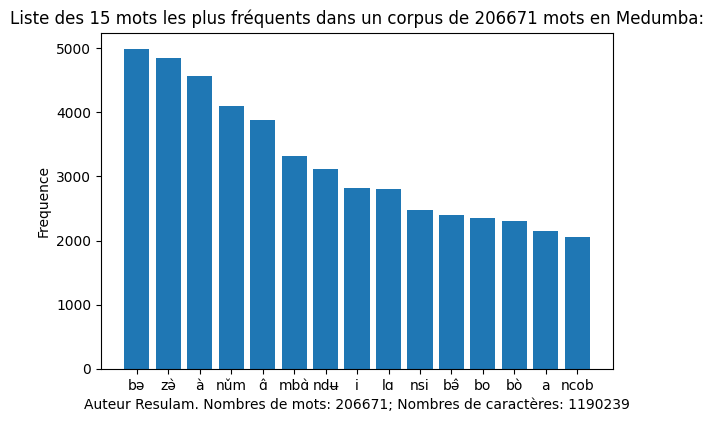

In [ ]:
###################################################################
# This Cell can take up to 2 min to run
###################################################################
# sent_start_with (Nufi_original,"Gh")
consonant = "bcdfghjklmnpqrstvwxyzŋńḿǹm̀m̄n̄m̌ňm̂n̂ńḿ"

# path = "/content/encyclopedie culture bamileke.txt"

path_file = "/content/Nufi_Emo_affaire_lit.txt"
path_file = "/content/text_nufi.txt"
path_file = "/content/text_nufi2.txt"
path_file = "/content/main_file1.txt"

path = path_file
def mostly_used_special_chr(data_path = path):
    
  import string
  import matplotlib.pyplot as plt
  from collections import Counter


  letters = string.ascii_letters

  
  with open(path_file) as f:
      data = f.readlines()
            
      data = list(map(lambda x: x.replace("\n",""), data))
      # list_nufi =  list(data["Nufi:Francais"])

      # string_nufi = "".join(list_nufi)

      words = " ".join(data).split(" ")

  # words_dict = dict.fromkeys(words, "Nufi")

  # forbiden_characters = r":<>[]()&*»_.,;/–1234567890«?=!…’+"
  forbiden_characters = r":[]()&*»_.,;/–1234567890«?=!…’+"


  # map( lambda x: x.strip(i) if i in [".,;"])

  clean_word = clean_word_function(words)

  # clean_word = [i for i in clean_word if i.lower() not in French_Words_dict.keys()]

  forbiden_fr = ["est","l'","d'","m'","n'","là","t"," ","s'","j'","qu'","qqn","l'on","lorsqu'on","s'il","qqch","d'après",
                 "présentatif","http","reference", "jeun","lorsqu'","dance","france",
                "il","lui","afrique","vrai","cameroun","prép","poss","adj","pron","bana","bafang","monthe","tchamna","ca᷅mnà'",
                "fè'éfě'è","nùfī", "ncɔ̀","nufi","nkhʉ̌","nkhʉ̀","pʉ́ɑ́","kwɑ̀","tāā","mōō","nshʉ̀'","pōō","kwɑ̌","fè'éfě'è"]
  clean_word = [i for i in clean_word if all(elem not in i for elem in forbiden_fr)]
  clean_word = [i.lower() for i in clean_word if i !=""]

  clean_word = list(map(lambda x: x.replace("yέέ","yáá"),clean_word))
  clean_word = list(map(lambda x: x.replace("nàh","làh"),clean_word))
  clean_word = list(map(lambda x: x.replace("nɛ̄","nā"),clean_word))

  
  
  # clean_word = [i for i in clean_word if i.lower() not in forbiden_fr]

  

  # words = [i for i in words if all(elem not in i for elem in forbiden_characters)]
  
  text = "".join(data)

  len_data = len(data)
  len_text = len(text)
  len_words = len(clean_word)
  
  set_words = list(set(clean_word))  
  dict_count_words = {i:words.count(i) for i in set_words}


  sorted_words_dict = sorted(dict_count_words.items(),key=lambda x: x[1],reverse=True )
  dict_count_words = dict(sorted_words_dict)
  
  # print(f"nombre de phrases:{len_data}\nnombres de mots: {len_words}\nnombre de caractères:{len_text}")

  text = text.lower()
  
  # text = words
  set_text = list(set(text))
  
  
  # dict_count = {i:text.count(i) for i in set_text if  i in letters and  i != " "}
  # dict_count = {i:text.count(i) for i in set_text if  i not in letters+"':<>[]()&*»-_.,\n;/–1234567890«?ç=!ï…’+œé" and  i != " "}
  dict_count_vowel = {i:text.count(i) for i in set_text if  i not in ":<>[]()&*»-_.,\n;/–1234567890«?ç=!ï…’+œqxr" and  i != " " and i not in consonant}
  dict_count_consonant = {i:text.count(i) for i in set_text if  i not in ":<>[]()&*»-_.,\n;/–1234567890«?ç=!ï…’+œqxr" and  i != " " and i in consonant}

  sorted_items_vowel = sorted(dict_count_vowel.items(),key=lambda x: x[1],reverse=True )
  dict_count_vowel = dict(sorted_items_vowel)

  sorted_items_cons = sorted(dict_count_consonant.items(),key=lambda x: x[1],reverse=True)
  dict_count_consonant_ = dict(sorted_items_cons)

  dict_count_ = {k:v for k,v in dict_count_vowel.items() if v>0}
  
  fig = plt.figure()
  ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))

  ax1.set_title("Liste des voyelles et tons les plus fréquents en langue Medumba: ")
  ax1.set_xlabel(f"Auteur Resulam. Nombres de mots: {len_words}; Nombres de caractères: {len_text}")
  ax1.set_ylabel('Frequence')

  plt.bar(dict_count_.keys(),dict_count_.values())
  # plt.title("Liste des caractères et tons les plus fréquent en langue fè’éfě’è: ")
  plt.show()
  #####################################################################################

  fig = plt.figure()
  ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))

  ax1.set_title("Liste des consonnes les plus fréquentes en langue Medumba:")
  ax1.set_xlabel(f"Auteur Resulam. Nombres de mots: {len_words}; Nombres de caractères: {len_text}")
  ax1.set_ylabel('Frequence')

  plt.bar(dict_count_consonant_.keys(),dict_count_consonant_.values())
  
  plt.show()
  #####################################################################################
  fig = plt.figure()
  ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
  top = 15
  dict_count_words_top = dict(Counter(dict_count_words).most_common(top))

  ax1.set_title(f"Liste des {top} mots les plus fréquents dans un corpus de {len_words} mots en Medumba:")
  ax1.set_xlabel(f"Auteur Resulam. Nombres de mots: {len_words}; Nombres de caractères: {len_text}")
  ax1.set_ylabel('Frequence')

  plt.bar(dict_count_words_top.keys(),dict_count_words_top.values())

  #####################################################################################



  # print(dict_count)  

    
  
  

  return dict_count_,dict_count_words

dict_counting = mostly_used_special_chr()
dict_counting[-1]
# "de","la","le","les", "à", "du", "qui", "et", "est"


# NEURAL NETWOK LANGUAGE MODEL 

# Creating Sequences
The way this problem is modeled is we take in 30 characters as context and ask the model to predict the next character. Now, 30 is a number which I got by trial and error and you can experiment with it too. You essentially need enough characters in the input sequence that your model is able to get the context.

In [ ]:
full_text_nufi = " "

for i in nufi_clean:
  full_text_nufi += " " + i

full_text_nufi.replace("\'","'")

'  yà wūkwà\'mbíɑ́ ngù\'fī mɑ́ làh ndə̄ə̄ndʉ̄ɑ̄ mvʉ́ɑ́ nǐ\' ndhī à làh ntō\' ngɑ̌ ìnjá\' pēn ō ngɑ̌ mɑ̀mmwēn fhʉ̄ pɑ́\' ó lɑ̀shʉ̀ɑ̀ lɑ́ tō ɑ́ nshʉ̀ɑ̀pʉ̀ sīē séh mbɑ̀ɑ̀ mǐ ndáh nkāpsī ō nsèn-wèn ntìè\' sī mbú á bɑ̄ zhínǔ wèn bɑ́ ndáh ī ngʉ́ nkām ntēh ndòò zén mbɑ̄\' ó mɑ́ zhìāndə̀ə̀ "6 mòmòshʉ̄ (litt grande disette)" mɑ̄vǒ mɑ̀ncēn mbìyā\' ngɑ̌ hèēhèè mbɑ̀ mʉ̀ ngɑ̌ cɑ̀\'sì ō lɑ́ ngà\'njǎm à mɑ̄vǒ zhí làh ndə̄ə̄ wúzɑ̄ ndàhnìnì zʉ̌\'sīē ŋwɑ̌\'nǐ pè\' ndhī lɑ́ və̄h nɑ́ à ǎ púánkhù ǎ mɑ̀ndáh sînǔ fɑ́h ì kə̄b nā ò lā\' lɑ́ ǒ sì mbát ngé\' kō\' ncáb nkhù nkɑ̀\' kɑ́lɑ̄\' khʉ̄ nɑ́ nù bǎ nzɑ́ yá\' mɑ̄ndēē pə̄ə̄ nā ò à kɑ̀\' láh nkàb nkōō nā ì nú sìā ngòp pěn mɑ̀ncá\'sí nǔkɑ́ yàā ndɑ̀h béè république bananière shwī tàm ngà\'mbhǐ à (yì mʉ̀nzhwīē) bɑ́ l\'on peut prédire l\'état d\'âme d\'un futur adulte par ses agissements innocents d\'enfance n b mbɑ̀wɑ̄lɑ̄ sɑ́\' nkó yì wúzɑ̄ ká\' njò\' ǒ sì píé\' wǎ\' nnū ngùh sōh pó ndáh có\'nìnì mfōpsī wū ngòò lɑ́ mɑ́ wà\' ā ngɑ̌ tóm mbhǐndèhsì wěn ndʉ̄ɑ̀ŋwɑ̀\'n

In [ ]:
def create_seq(text):
    length = 30
    sequences = list()
    for i in range(length, len(text)):
        # select sequence of tokens
        seq = text[i-length:i+1]
        # store
        sequences.append(seq)
    print('Total Sequences: %d' % len(sequences))
    return sequences

# create sequences   
# sequences = create_seq(data_new)
full_text_nufi = full_text_nufi[0:500]
sequences = create_seq(full_text_nufi)

sequences[0:10]


'  yà wūkwà\'mbíɑ́ ngù\'fī mɑ́ làh ndə̄ə̄ndʉ̄ɑ̄ mvʉ́ɑ́ nǐ\' ndhī à làh ntō\' ngɑ̌ ìnjá\' pēn ō ngɑ̌ mɑ̀mmwēn fhʉ̄ pɑ́\' ó lɑ̀shʉ̀ɑ̀ lɑ́ tō ɑ́ nshʉ̀ɑ̀pʉ̀ sīē séh mbɑ̀ɑ̀ mǐ ndáh nkāpsī ō nsèn-wèn ntìè\' sī mbú á bɑ̄ zhínǔ wèn bɑ́ ndáh ī ngʉ́ nkām ntēh ndòò zén mbɑ̄\' ó mɑ́ zhìāndə̀ə̀ "6 mòmòshʉ̄ (litt grande disette)" mɑ̄vǒ mɑ̀ncēn mbìyā\' ngɑ̌ hèēhèè mbɑ̀ mʉ̀ ngɑ̌ cɑ̀\'sì ō lɑ́ ngà\'njǎm à mɑ̄vǒ zhí làh ndə̄ə̄ wúzɑ̄ ndàhnìnì zʉ̌\'sīē ŋwɑ̌\'nǐ pè\' ndhī lɑ́ və̄h nɑ́ à ǎ púánkhù ǎ mɑ̀ndáh sînǔ fɑ́h ì kə̄b nā ò lā'

# Encoding Sequences
Once the sequences are generated, the next step is to encode each character. This would give us a sequence of numbers.



In [ ]:

# create a character mapping index
chars = sorted(list(set(full_text_nufi)))
mapping = dict((c, i) for i, c in enumerate(chars))

def encode_seq(seq):
    sequences = list()
    for line in seq:
        # integer encode line
        encoded_seq = [mapping[char] for char in line]
        # store
        sequences.append(encoded_seq)
    return sequences

# encode the sequences
sequences = encode_seq(sequences)
# sequences[0]
# 'the unanimous declaration the t'
# [19,  8,  5,  0,  20,  13,  1,  13,  9,   12,  14,  20,  18,  0, 4,  5,  3,  11,  1,  17,  1,  19,  9,  14,  13,  0,  19,  8,  5,  0,  19]


# Create Training and Validation set
Once we are ready with our sequences, we split the data into training and validation splits. This is because while training, I want to keep a track of how good my language model is working with unseen data.



In [ ]:
from sklearn.model_selection import train_test_split

# vocabulary size
vocab = len(mapping)
sequences = np.array(sequences)
# create X and y
X, y = sequences[:,:-1], sequences[:,-1]
# one hot encode y
y = to_categorical(y, num_classes=vocab)
# create train and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print('Train shape:', X_tr.shape, 'Val shape:', X_val.shape)

Train shape: (423, 30) Val shape: (47, 30)


# Model Building
Time to build our language model!

I have used the embedding layer of Keras to learn a 50 dimension embedding for each character. This helps the model in understanding complex relationships between characters. I have also used a GRU layer as the base model, which has 150 timesteps. Finally, a Dense layer is used with a softmax activation for prediction.

In [ ]:
# define model
model = Sequential()
model.add(Embedding(vocab, 50, input_length=30, trainable=True))
model.add(GRU(150, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(vocab, activation='softmax'))
print(model.summary())

# compile the model
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
# fit the model
model.fit(X_tr, y_tr, epochs=100, verbose=2, validation_data=(X_val, y_val))

# Inference
Once the model has finished training, we can generate text from the model given an input sequence using the below code:

In [ ]:
# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
  in_text = seed_text
  # generate a fixed number of characters
  for _ in range(n_chars):
    # encode the characters as integers
    encoded = [mapping[char] for char in in_text]
    # truncate sequences to a fixed length
    encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
    # predict character
    # yhat = model.predict(encoded, verbose=0)
    # yhat = (model.predict(encoded)>0.5).astype("int32")
    predict_x=model.predict(encoded) 
    yhat=np.argmax(predict_x,axis=1)
    # print(yhat)
    # yhat = (model.predict(encoded) > 0.5).astype("int32")

    # yhat = model.predict(encoded, verbose=0)
    
    # reverse map integer to character
    out_char = ''
    for char, index in mapping.items():
      if index == yhat:
        out_char = char
        break
    # append to input
    in_text += char
  return in_text

In [ ]:
 inp = "yáá mbɑ̄ mbí m"
generate_seq(model, mapping, 40, inp.lower(), 10)

1/1 [==============================] - 0s 45ms/step


'yáá mbɑ̄ mbí mbɑ mɑ̀mmẁ'

In [ ]:
full_text_nufi

'  yà wūkwà\'mbíɑ́ ngù\'fī mɑ́ làh ndə̄ə̄ndʉ̄ɑ̄ mvʉ́ɑ́ nǐ\' ndhī à làh ntō\' ngɑ̌ ìnjá\' pēn ō ngɑ̌ mɑ̀mmwēn fhʉ̄ pɑ́\' ó lɑ̀shʉ̀ɑ̀ lɑ́ tō ɑ́ nshʉ̀ɑ̀pʉ̀ sīē séh mbɑ̀ɑ̀ mǐ ndáh nkāpsī ō nsèn-wèn ntìè\' sī mbú á bɑ̄ zhínǔ wèn bɑ́ ndáh ī ngʉ́ nkām ntēh ndòò zén mbɑ̄\' ó mɑ́ zhìāndə̀ə̀ "6 mòmòshʉ̄ (litt grande disette)" mɑ̄vǒ mɑ̀ncēn mbìyā\' ngɑ̌ hèēhèè mbɑ̀ mʉ̀ ngɑ̌ cɑ̀\'sì ō lɑ́ ngà\'njǎm à mɑ̄vǒ zhí làh ndə̄ə̄ wúzɑ̄ ndàhnìnì zʉ̌\'sīē ŋwɑ̌\'nǐ pè\' ndhī lɑ́ və̄h nɑ́ à ǎ púánkhù ǎ mɑ̀ndáh sînǔ fɑ́h ì kə̄b nā ò lā'

# Build our own Word Completion Model (using pretrained chat Gpt2)

In [ ]:
pip install pytorch-transformers

In [ ]:
import torch
from pytorch_transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode a text inputs
text = "He told me that"
indexed_tokens = tokenizer.encode(text)

# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

# # If you have a GPU, put everything on cuda
# tokens_tensor = tokens_tensor.to('cuda')
# model.to('cuda')

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

# Get the predicted next sub-word
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])

# Print the predicted word
print(predicted_text)

 He told me that he


In [ ]:
!git clone https://github.com/huggingface/pytorch-transformers.git


Cloning into 'pytorch-transformers'...
remote: Enumerating objects: 133717, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 133717 (delta 120), reused 163 (delta 112), pack-reused 133538
Receiving objects: 100% (133717/133717), 129.15 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (100936/100936), done.


In [ ]:
!python pytorch-transformers/examples/run_generation.py \
    --model_type=gpt2 \
    --length=100 \
    --model_name_or_path=gpt2 \

python3: can't open file '/content/pytorch-transformers/examples/run_generation.py': [Errno 2] No such file or directory


In [ ]:
parser.add_argument('--gpu', type=str, default="1", help='choose GPU')


NameError: ignored

In [ ]:
# Download the data:
# https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge
# https://lazyprogrammer.me/course_files/toxic_comment_train.csv
# Download the word vectors:
# http://nlp.stanford.edu/data/glove.6B.zip


# some configuration
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10



# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(os.path.join('../large_files/glove.6B/glove.6B.%sd.txt' % EMBEDDING_DIM)) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))



Loading word vectors...


FileNotFoundError: ignored

In [ ]:


# prepare text samples and their labels
print('Loading in comments...')

train = pd.read_csv("../large_files/toxic-comment/train.csv")
sentences = train["comment_text"].fillna("DUMMY_VALUE").values
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
targets = train[possible_labels].values




In [ ]:

# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
# print("sequences:", sequences); exit()


print("max sequence length:", max(len(s) for s in sequences))
print("min sequence length:", min(len(s) for s in sequences))
s = sorted(len(s) for s in sequences)
print("median sequence length:", s[len(s) // 2])

print("max word index:", max(max(seq) for seq in sequences if len(seq) > 0))


# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

# exit()


# pad sequences so that we get a N x T matrix
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)



# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector



# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)


print('Building model...')

# train a 1D convnet with global maxpooling
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(possible_labels), activation='sigmoid')(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

print('Training model...')
r = model.fit(
  data,
  targets,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)


# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the mean AUC over each label
p = model.predict(data)
aucs = []
for j in range(6):
    auc = roc_auc_score(targets[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))
